>## <b> Evaluation Project 5:Census Income Project  </b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

## Census Income Project

__Problem Statement:__


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below.

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

## Now Importing the Required Liabary to Perform the Evaluatroy Data Anaylsis

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

## Now we will import the dataset using pandas liabary

In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 32560
No of Columns: 15


Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

__Here we can see that in the dataset we have 32500 no. of rows and 15 no. of columns__

In [4]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)

In [5]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

## Here we have the columns:

- Age : its name say what it is exactly, it showing the age of person.
- Workclass:   It means, person is govt servant, private servant or self employeed or others
- FnlWgt: By its name we are not getting clear idea which type of information contained in it. By checking some values of this features we get information it is sample weight features of census data.
- Education: Its cleary define that education status of person/ people of society.
- Education_Num: Its also not providing clear info as we already having the feature of education, after doing some study, this feature is about the number of years in eduaction total.
- Marital_status : Its cleary states the Married or Unmarried or divorced
- Relationship: Its show husband, wife or not in family etc
- Race: by its about the color code Black or white I think.
- Captial Gain /Loss: It means income or loss from the capital investment.
- Hours_per_week : Working hours in a week
- Native country: It's Nationality 
- Income: Its about earning from various sources, like saving, salary, investment, rent etc

### As we know our target feature is Income, As we need to   predict  wheather a person has income of 50 K USD per year.


### Here in the given dataset we have some feature  which are categorical and some feature are numerical. 

## So from the above statement , I can say that this is a "Classification Problem".


## Data Integrity Check

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- Here we have integer type data in following features:
  -Age, FNlwgt, Education_num, Captial_gain, Capital_loss,Hours_per_week featurs(Numerical_Features)
  
- Here we have object type data in following features:
- Workclass,Education,Marital_status,Occupation,Relationship, Race, Sex, Native_Country, Income(categorical_Features)

### Now will check the unique value of each features

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- Above are the unique value count of each column in the dataset.

- __Let's check for any entry which is repeated or duplicated in dataset.__

In [9]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

24

- Let's check the Null value present in the dataset or not.

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

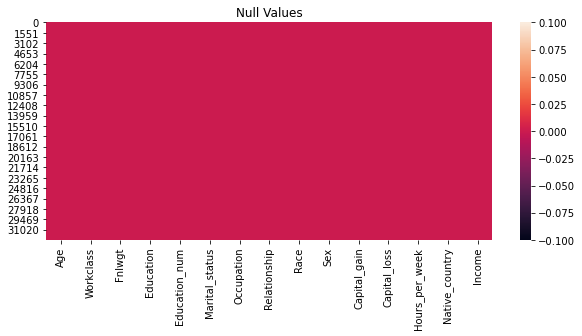

In [11]:
#Visualizeing null values through heatmap
plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

##### From the above code here we get that there is no missing value. Let's try to investigate the dataset and to get clear idea about null value available or not.

In [12]:
#Checking unique values of target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

### There are only two unique counts in the target column so it's a binary classification problem.

In [13]:
#Checking for empty observations
df.loc[df['Income'] == " "]

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []

- There is no empty observations in the dataset.

### So We can notice that there are some '?' entries in Workclass, Occupation and Native_country column.

### Let's replace ' ?' with np.NaN

In [14]:
df=df.replace(' ?',np.NaN)

__Now we will remove the duplicate values from dataset__

In [15]:
df.drop_duplicates(keep='last', inplace=True)

In [16]:
df.shape

(32536, 15)

## Missing value check

<AxesSubplot:>

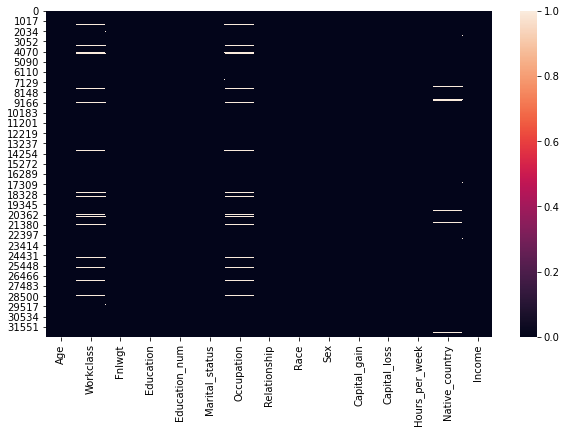

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

## Comment:

- There are missing values in Occupation,workclass, Native country.

In [18]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Occupation                1843        5.664495
Workclass                 1836        5.642980
Native_country             582        1.788788
Age                          0        0.000000
Fnlwgt                       0        0.000000
Education                    0        0.000000
Education_num                0        0.000000
Marital_status               0        0.000000
Relationship                 0        0.000000
Race                         0        0.000000
Sex                          0        0.000000
Capital_gain                 0        0.000000
Capital_loss                 0        0.000000
Hours_per_week               0        0.000000
Income                       0        0.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


 __Observation:__

- There are 32536 rows , 14 Independent columns and 1 Target feature.

## Now we will distribute dataset into two types of category

In [20]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [21]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in Category:
    print(i)
    print(df[i].value_counts())

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       4136
 Craft-repair         40

## Missing value Imputation

### As we already dicuss the missing value available in Occupation,workclass, Native country features and these are categorical features

- So, here we are going to replace the null value by using mode

In [22]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

## After doing Imputation we will check again the missing value %.

In [23]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


__Observation:__

Finally there is no missing value available in the dataset.

## Now Will Perform Statistical Analysis

<AxesSubplot:>

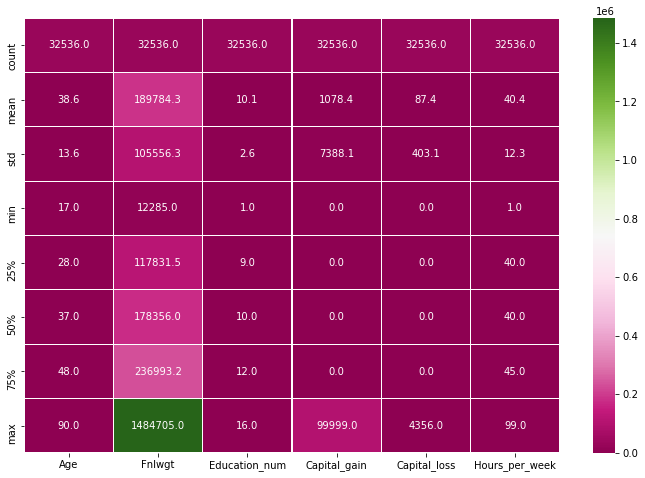

In [24]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [25]:
df.describe().T

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education_num       10.0      12.00       16.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0

___Observation:___
- __The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.__
- __The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.___
- __While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.__
- ___The number of hours spent per week varies between 1 to 99 and the average being 40 hours.___

## Exploring categorial features with Enlisting Value counts & Sub-categories

In [26]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('='*100)
        print('****************************************')

36    898
31    888
34    886
23    876
35    875
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
203488    13
164190    13
123011    13
121124    12
148995    12
          ..
209392     1
218551     1
201204     1
362999     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 

## Explaintory Data Anaylsis

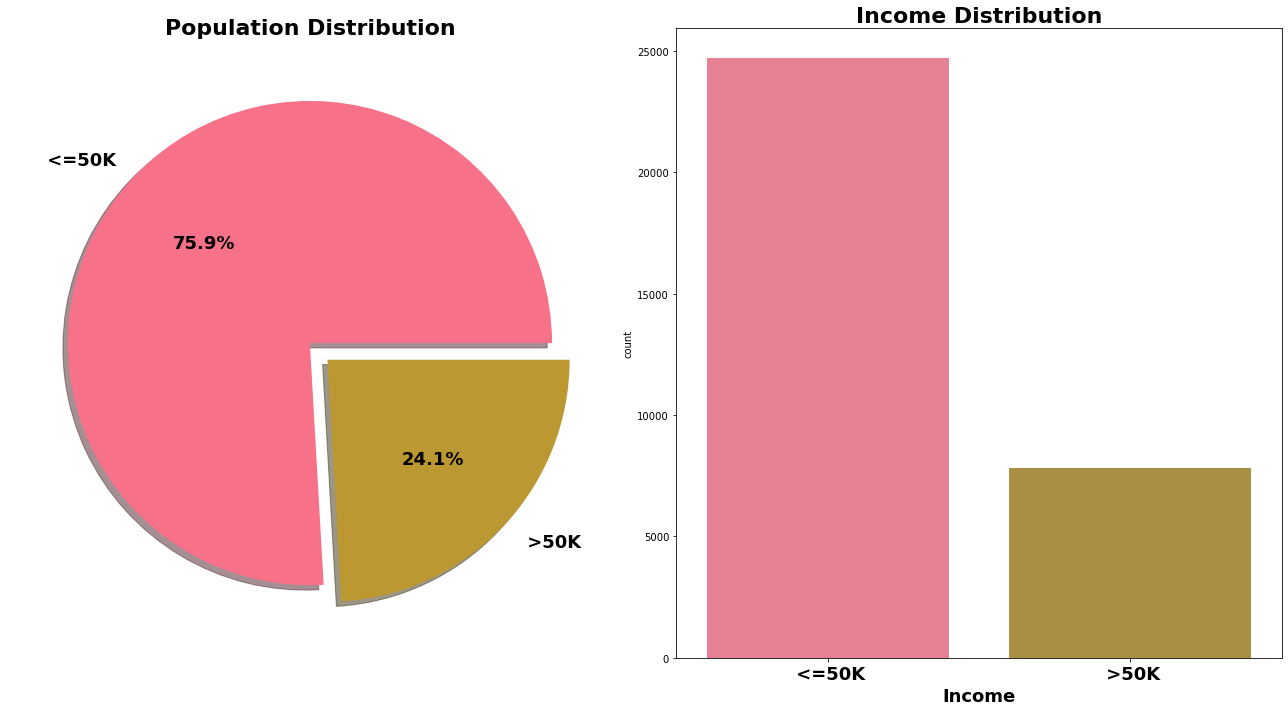

In [27]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- 75.9 % population (24697 peoples) have income less than 50K.
- Our task is to predict income and we see that target variable income is imbalanced.

<b> Let check each feature against Target variable to gain more insight into data before finding answer of important questions. </b>

In [28]:
# Now Exploring Age feature

print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


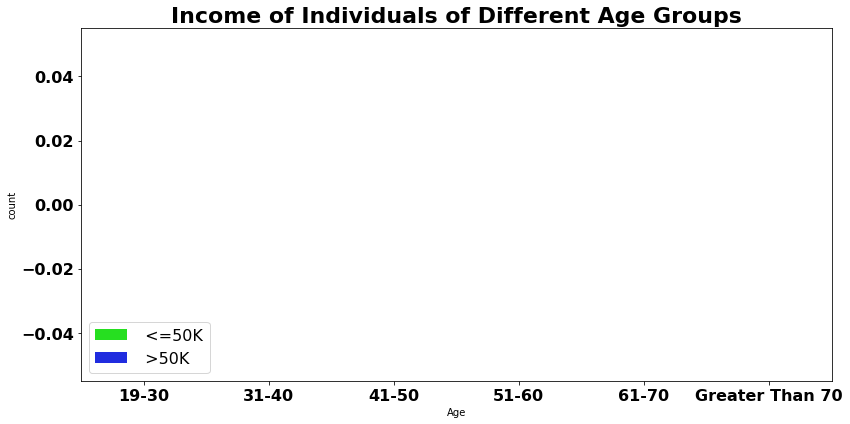

In [30]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(df['Age_Group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age_Group')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

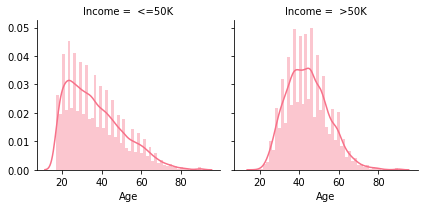

In [31]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

___Observation:___

___Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong.___

- almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70. Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.
- We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. It will be interesting to find out which profession lead this income to this category.

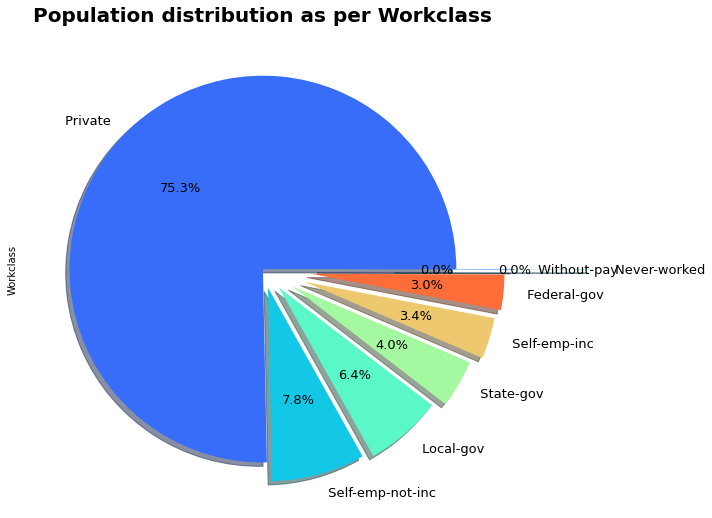

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Workclass', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

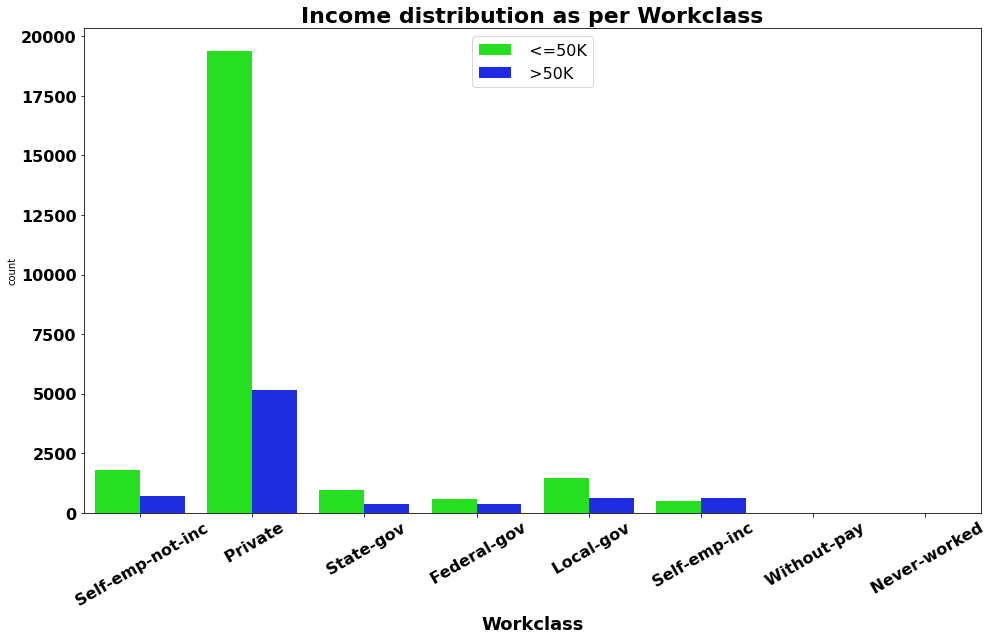

In [33]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [34]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

#### Observation :
- 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
- <b><em>Interseting observation comes with <u> Self-Employed Incorporated </u> category where the number of people who earn more than 50K dollars exceed those earning less than it ! </em></b>
    
- There is significant difference between private sector employees income where <u> less than 25 % people earn more than 50K dollars an year.</u> 
- Another quite surprising insight comes from Federal Goverment countplot where <b><em> We can see very minute difference between the number of people whose income is more or less than 50K dollars an year.</em></b> Same goes with state goverment with some difference. 
    
- Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good !!!

<b><em>Certainly Goverment Emplyoees have high wages compare to private !!!</em></b>

##  NOw  Comparing Education Vs Income feature

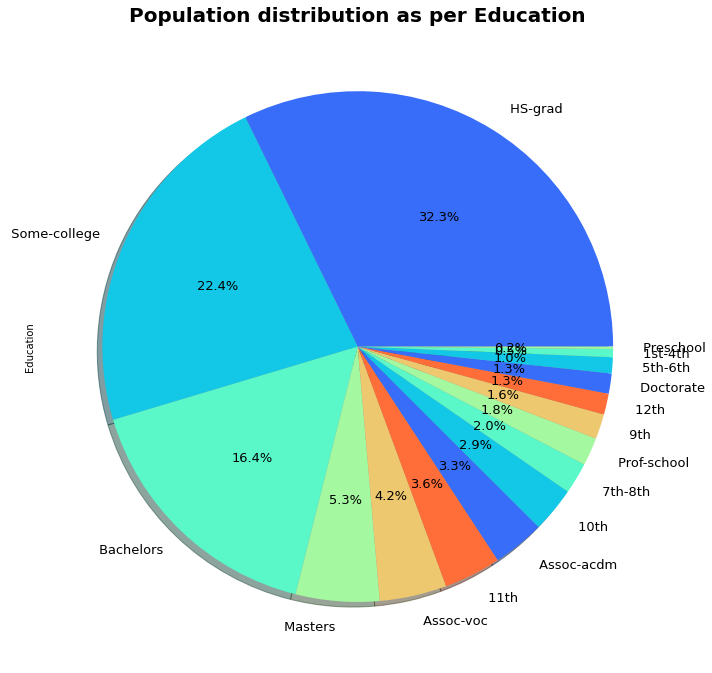

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

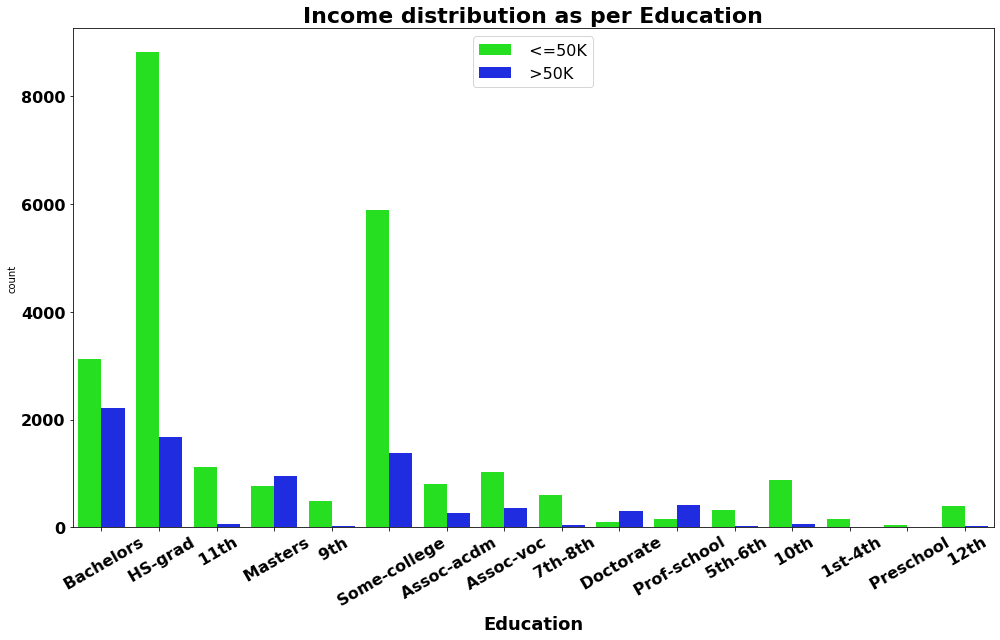

In [36]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
- Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
- 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
- There are very handful people who earn more than 50 K dollars having education below 12th level.
- Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
- <b> Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.</b>
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [37]:
pd.crosstab(df['Education'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

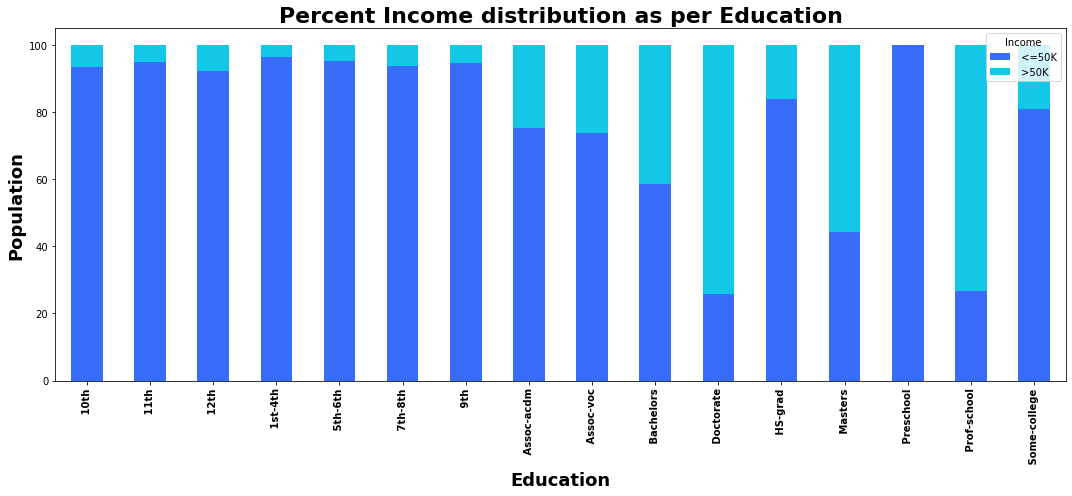

In [38]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.
- <b> So, Highly earning people most of times comes with Masters or Doctorate education background.</b>
- From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.
- Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

##  Now finding the Impact of Marital Status on Income Feature

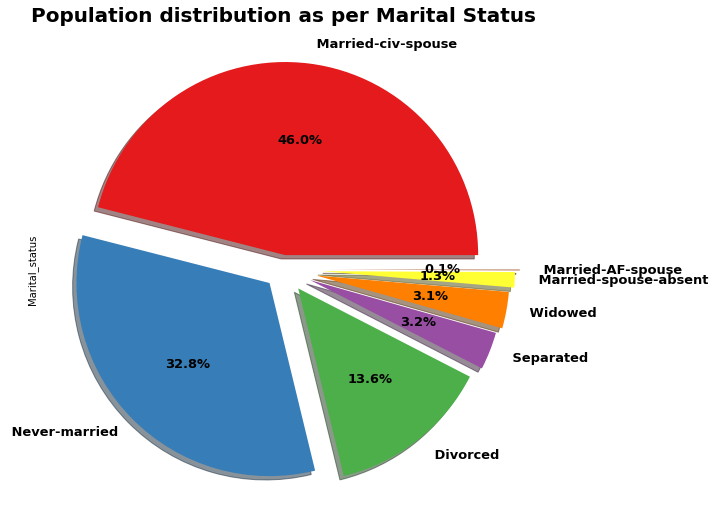

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
plt.figure(figsize=(10,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%', explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],
                                             textprops ={'fontsize':13,'fontweight':'bold'},shadow=True)
plt.title('Population distribution as per Marital Status', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

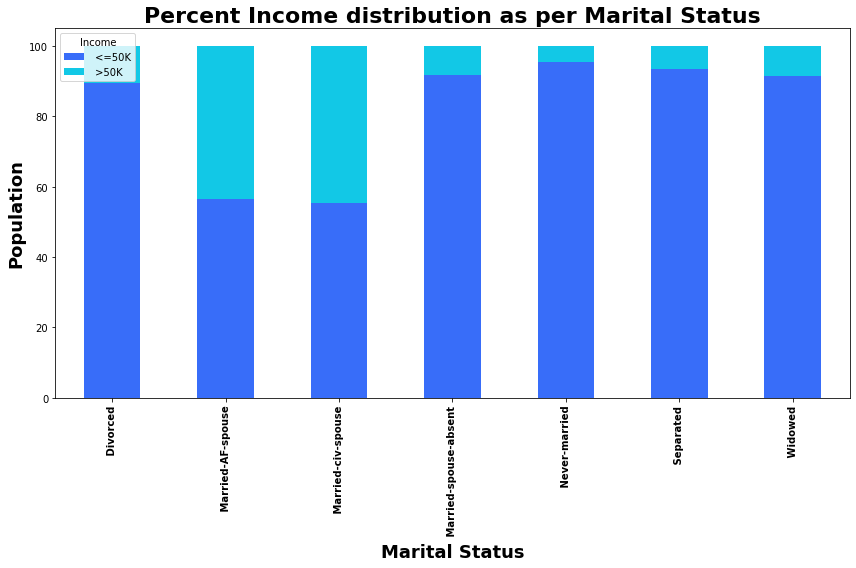

In [40]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [41]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

#### Observation :
<b> Married people are most like to earn more than 50K dollars an year.
    
Reason Might be Emotional support and stability of life than who are divorced/separated.</b>
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

 ## Now Comparing Occupation VS Income Feature

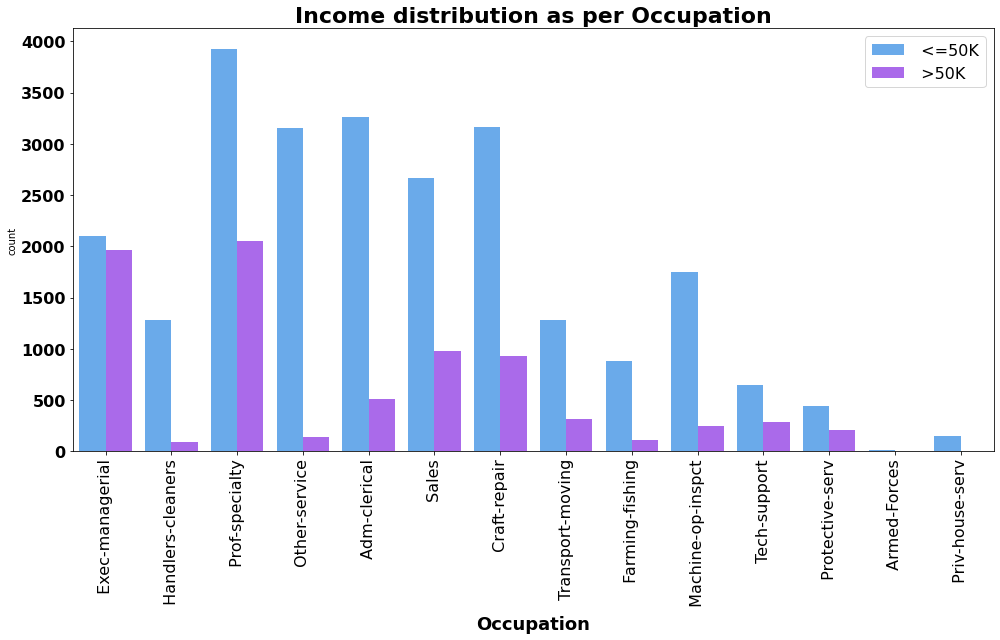

In [42]:
plt.figure(figsize=(14,9))
p = sns.countplot(df['Occupation'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

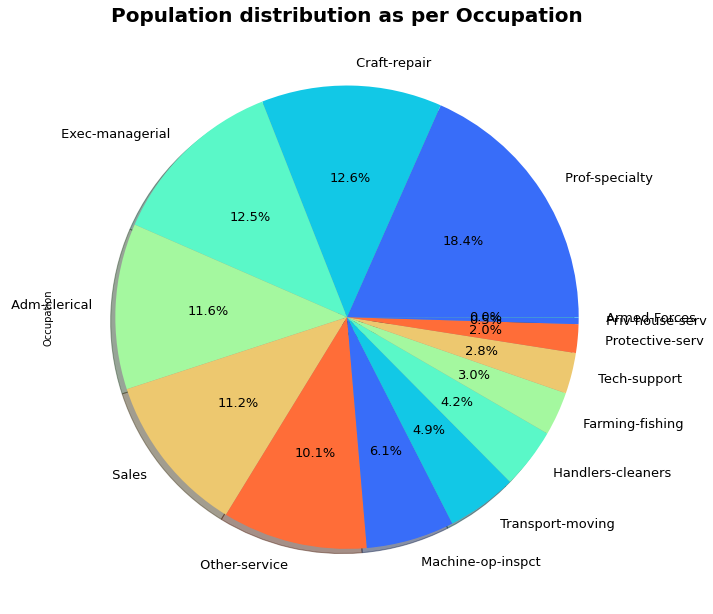

In [43]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Occupation', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation :
- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.


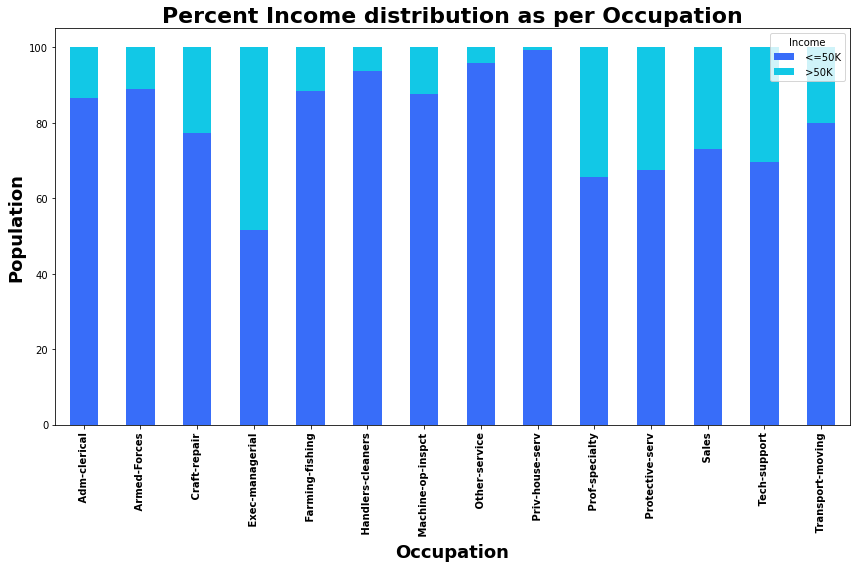

In [44]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [45]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='winter_r')

#### Observation :
-  <b>Prof-Speciality position with maximum 2049 peoples followed by Exec-managerial position with 1968 people leads chart for greater than 50K dollars an year.</b>
- If we talk in term of <b> percentage probablity Exective Managerial position have 50% chances to lead in Greater than 50K dollars Club.</b>
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
-<b> Minimum chances for Greater than 50K Club comes from Private House Service occupation </b> where 1/147 chance of getting more than 50K dollars an year.

<b> Let check where these different occupation fit with respect to Work class through crosstab. </b>

In [46]:
pd.crosstab(df['Occupation'],df["Workclass"], margins=True).style.background_gradient(cmap='winter_r')

#### Observation :
- <b> Here is another surprising element, there are 7 peoples From Never Worked Category  with High earning Profession of Prof-speciality. Same from Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid internship profile.</b>

## Relationship VS Income feature

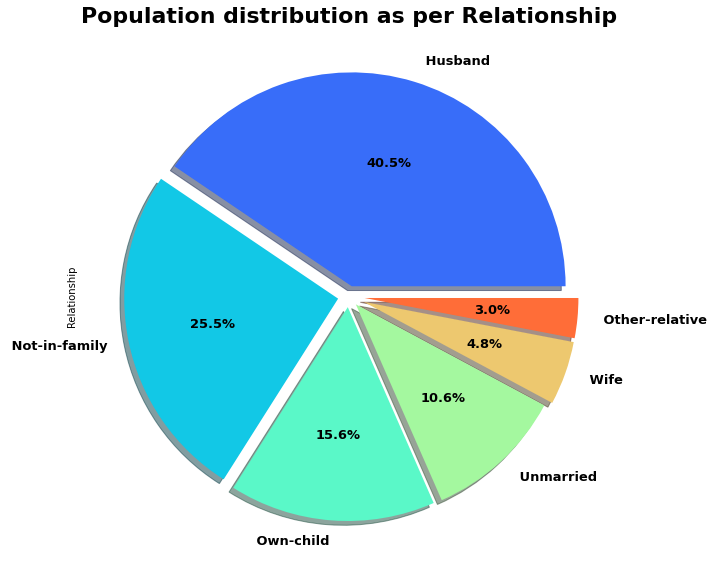

In [47]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

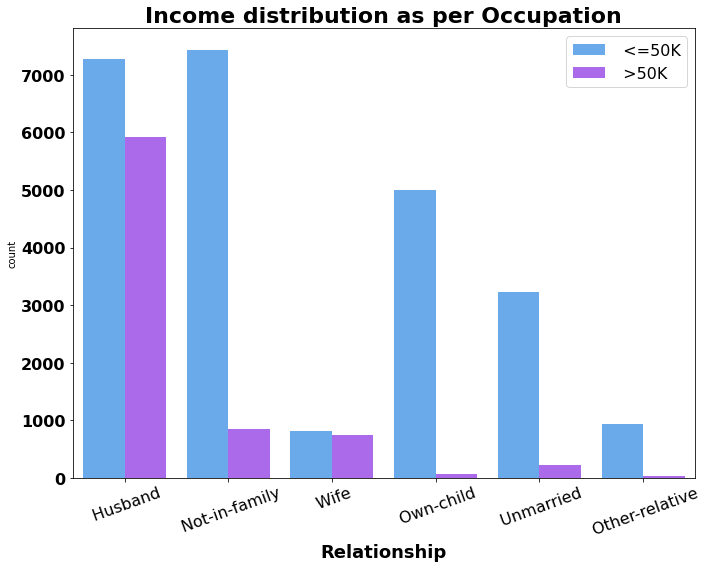

In [48]:
plt.figure(figsize=(10,8))
p = sns.countplot(df['Relationship'], hue=df['Income'], palette='cool')
plt.title('Income distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

#### Observation:
- Wifes are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

##  Race vs Income

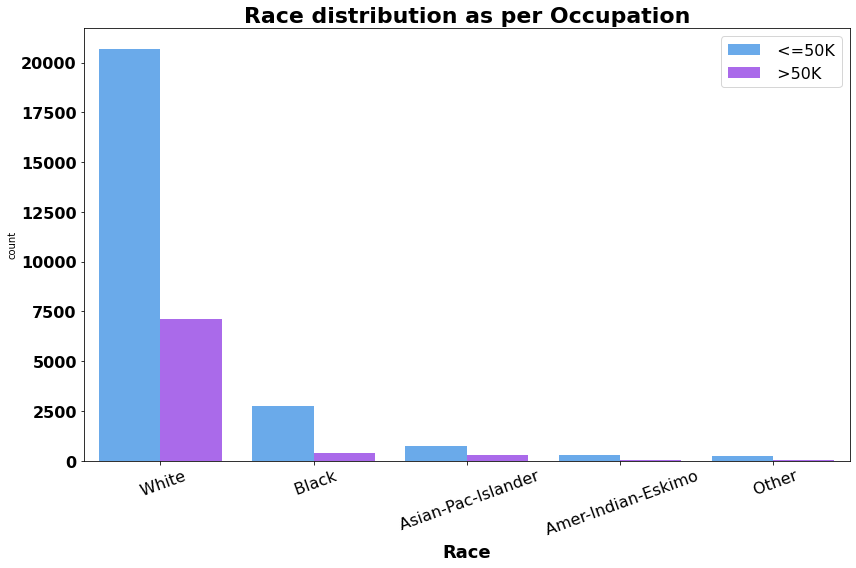

In [49]:
plt.figure(figsize=(12,8))
p = sns.countplot(df['Race'], hue=df['Income'], palette='cool')
plt.title('Race distribution as per Occupation', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,rotation=20)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

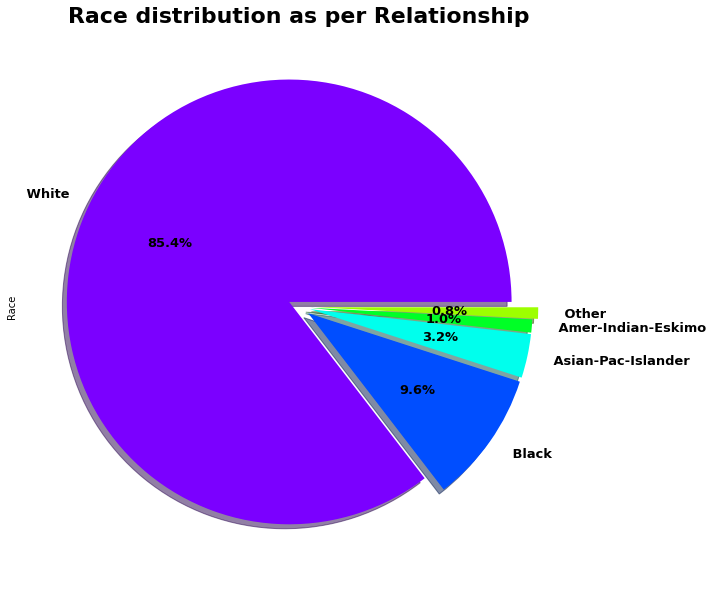

In [50]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(10,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)
plt.title('Race distribution as per Relationship', fontsize=22,fontweight ='bold')
plt.tight_layout()
plt.show()

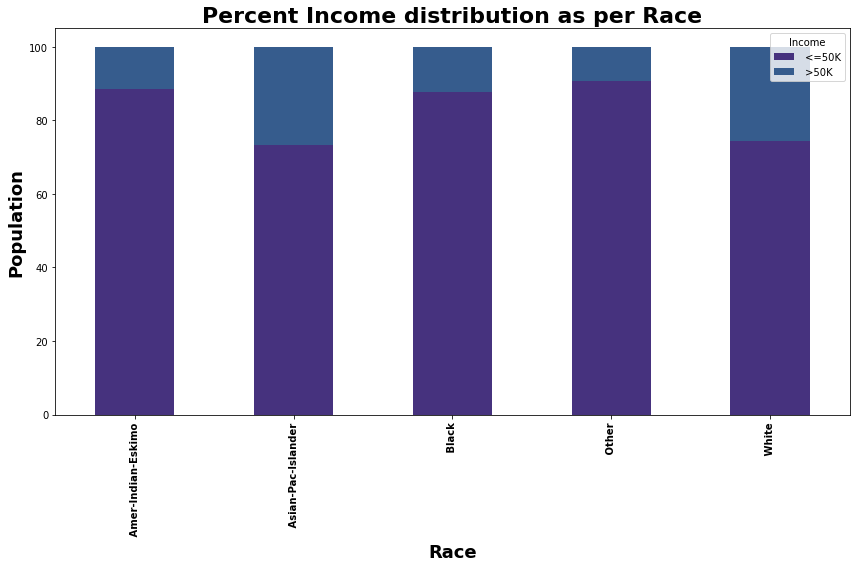

In [51]:
# Percentage Income distribution in terms of Education
sns.set_palette('viridis')
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

#### Observation:
- 85.4 % peoples are whites followed by black community with 9.6%.
- Maximum peoples in Greater than 50K Club are White.
-<b> This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.</b>

## Sex Vs Income Feature

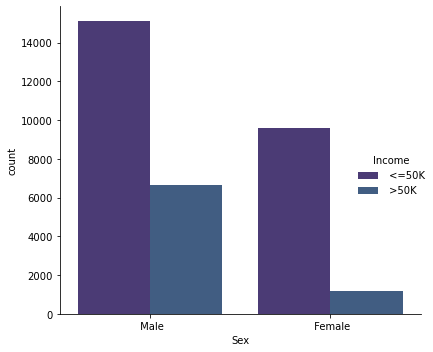

In [52]:
#Factor plot for Sex
sns.factorplot('Sex',kind='count',data=df,hue='Income')
plt.xticks(rotation=0);

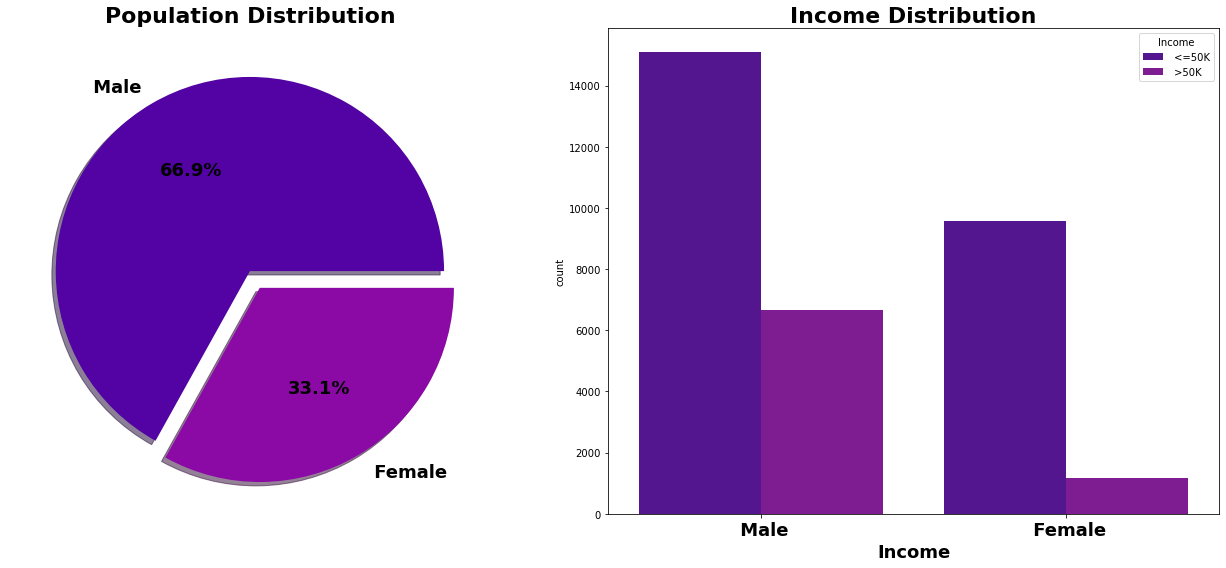

In [53]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Significant gap between male and female earnings.
- <b>Less than 10% Women in Greater Than 50K Dollar Club.</b>
- Around 33% of Men earning more than 50K dollars an year.

<b> Let find in which profession these women involved in . </b>

In [54]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True).style.background_gradient(cmap='winter_r')

#### Observation:
- Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
- Same as in case of Men Maximum number in <u> Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.</u>
- Maximum men work in Prof-Specialty.

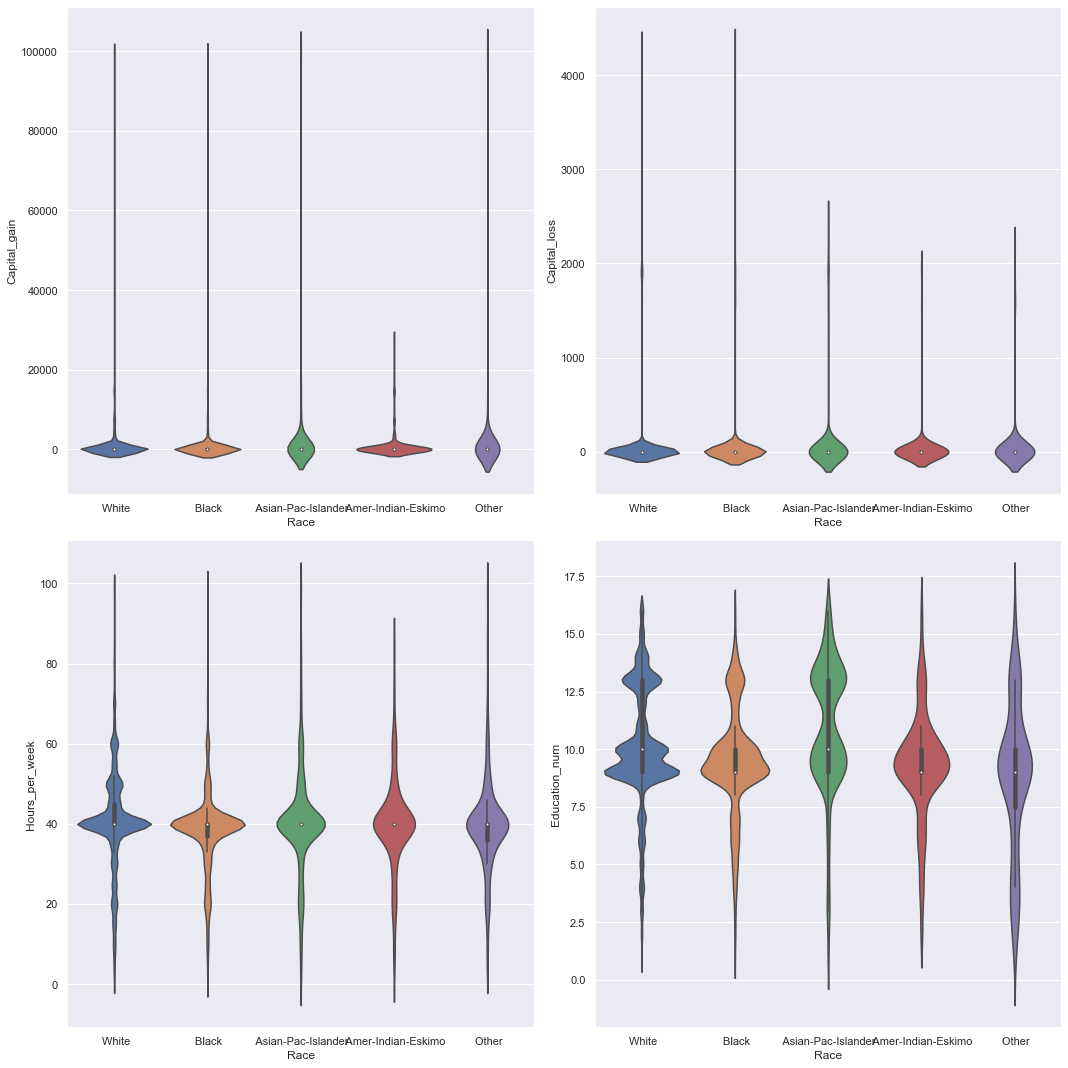

In [55]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

# This Violin plot show how capital gain, loss, hours per week and education vary with the race of the people
plt.subplot(2,2,1)
sns.violinplot(x = df['Race'], y = df['Capital_gain'], data = df);
plt.subplot(2,2,2)
sns.violinplot(x = df['Race'], y = df['Capital_loss'], data = df);
plt.subplot(2,2,3)
sns.violinplot(x = df['Race'], y = df['Hours_per_week'], data = df);
plt.subplot(2,2,4)
sns.violinplot(x = df['Race'], y = df['Education_num'], data = df);

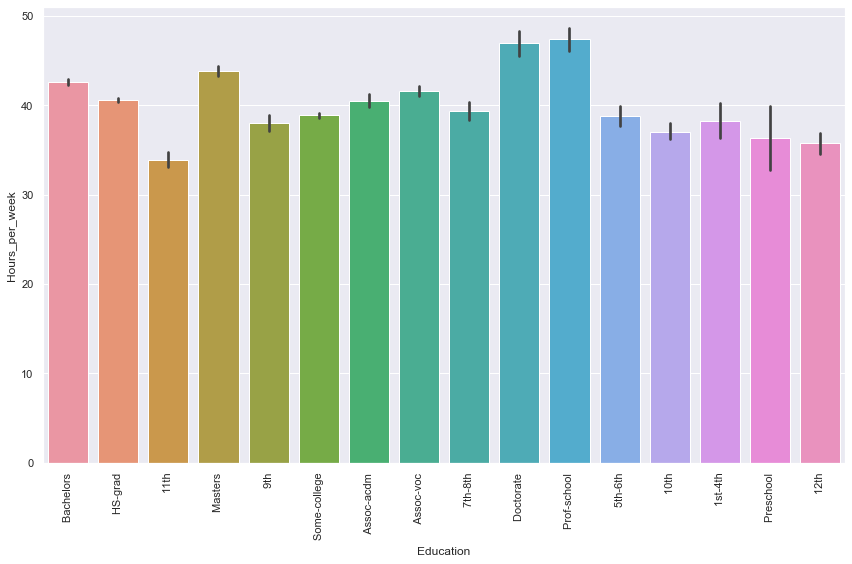

In [56]:
# This shows the hours per week according to the education of the person
sns.set(rc={'figure.figsize':(12,8)})
sns_grad = sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=90)
plt.show()

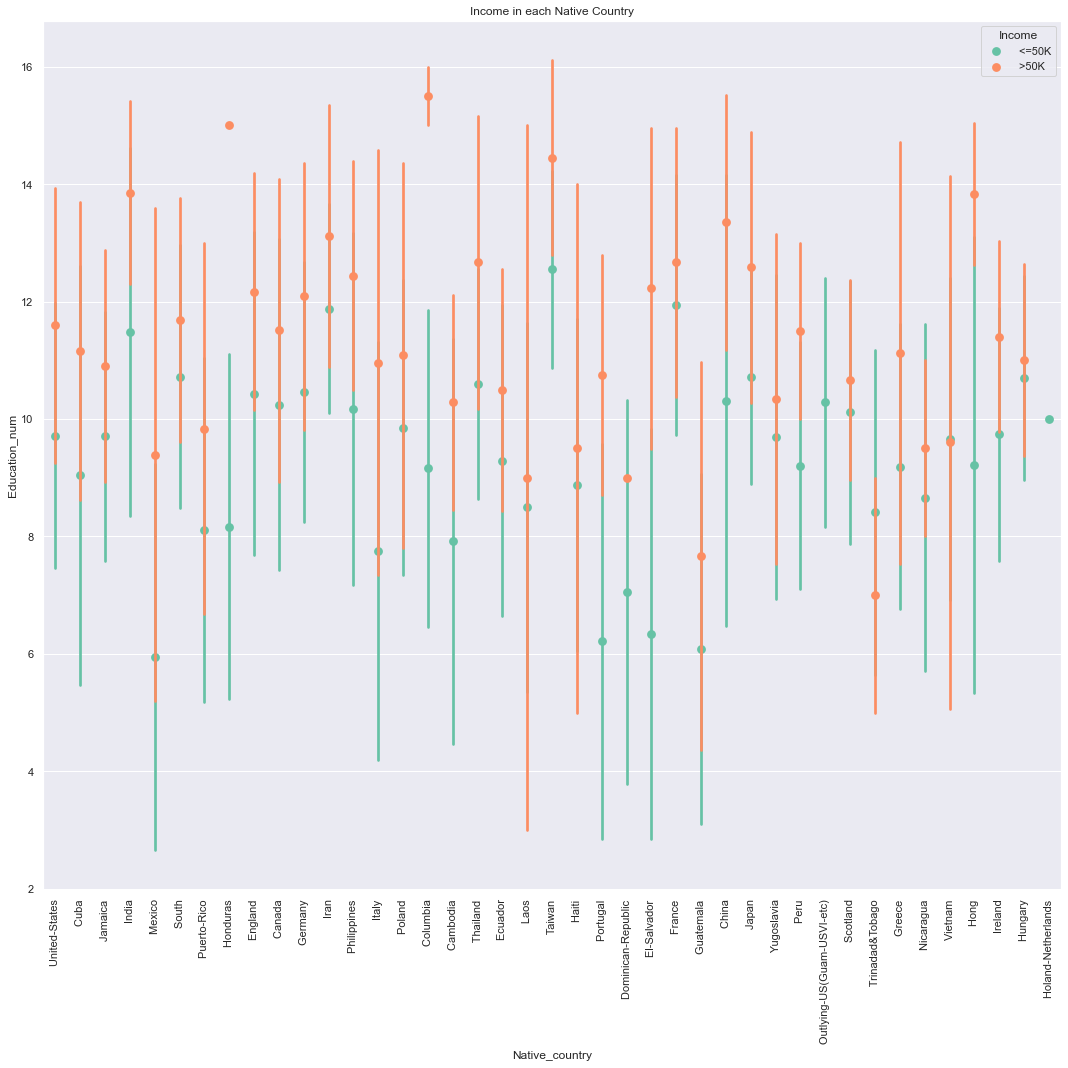

In [57]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


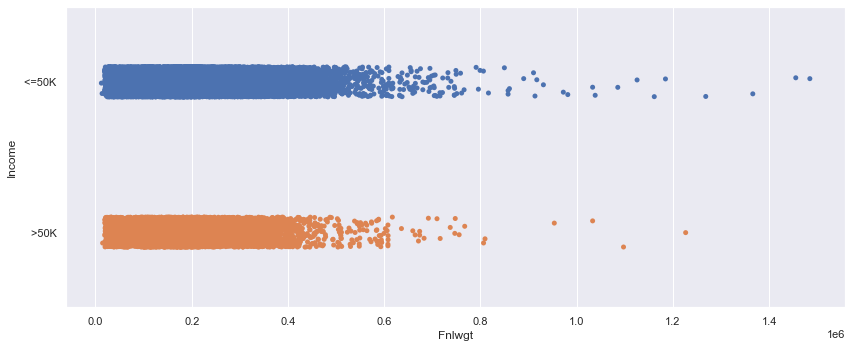

In [58]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

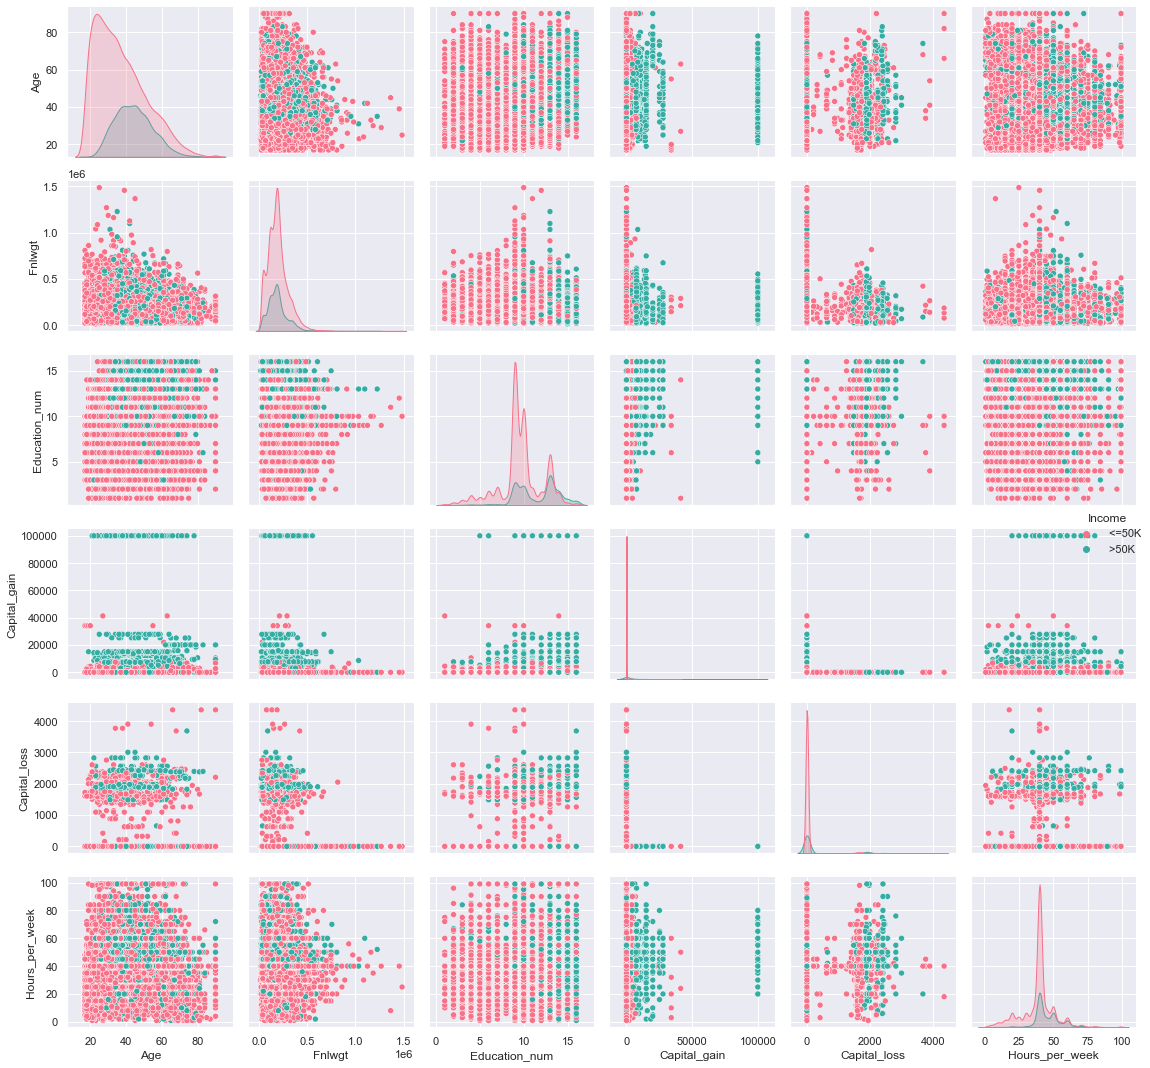

In [59]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

<AxesSubplot:title={'center':'comparison between Capital_loss and Occupation'}, xlabel='Capital_loss', ylabel='Occupation'>

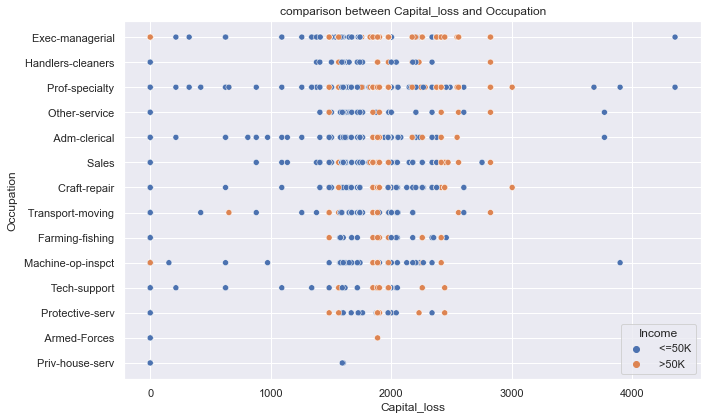

In [60]:
plt.figure(figsize=[10,6])
plt.title("comparison between Capital_loss and Occupation")
sns.scatterplot(df['Capital_loss'],df['Occupation'],hue=df["Income"])

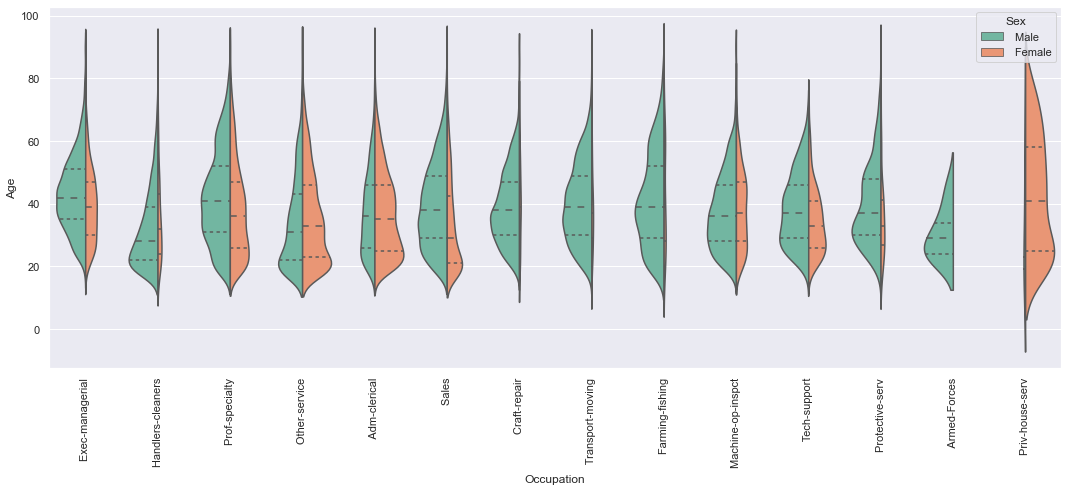

In [61]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Above violin plot showing that the designation of private house services has more number of female mostly from the 20-60 age group while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number of data coverage for males.

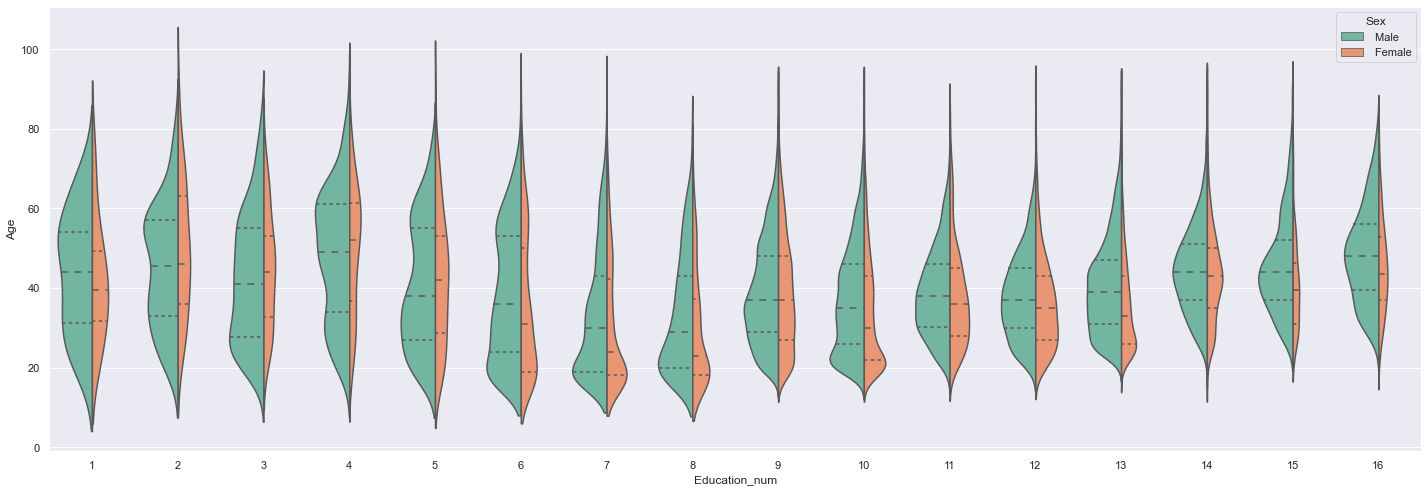

In [62]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

above plot showing males in all age group have a higher education number compared to their female counter parts

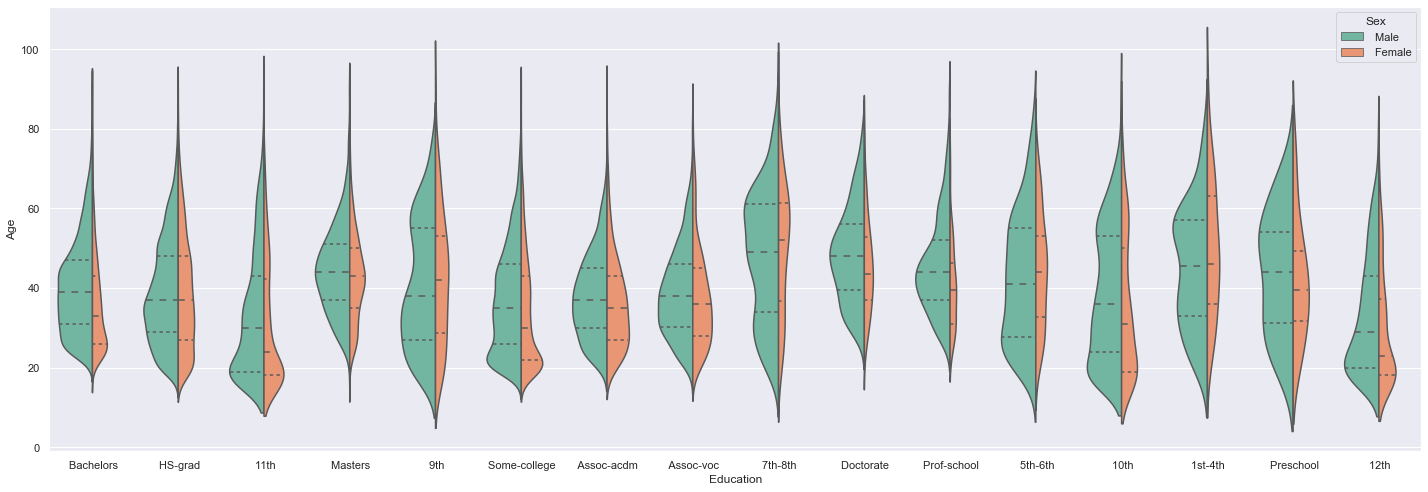

In [63]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above plot showing education number and education category has more number of males than their female. it is a concern of female education.

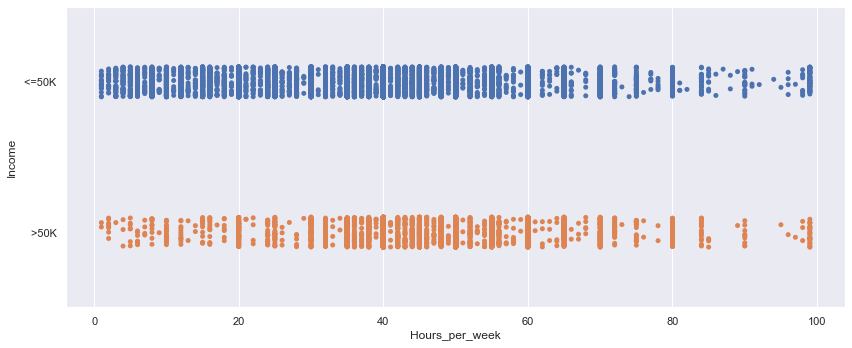

In [64]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

In above strip plot people who have income less than or equal to 50K put in more hours per week as compared to the one's who earn more than 50K as income

## Now We will do label encoding for Categorical Features

In [65]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

## Feature selection and Engineering

## 1. Will do Outliers  Detection and Removal

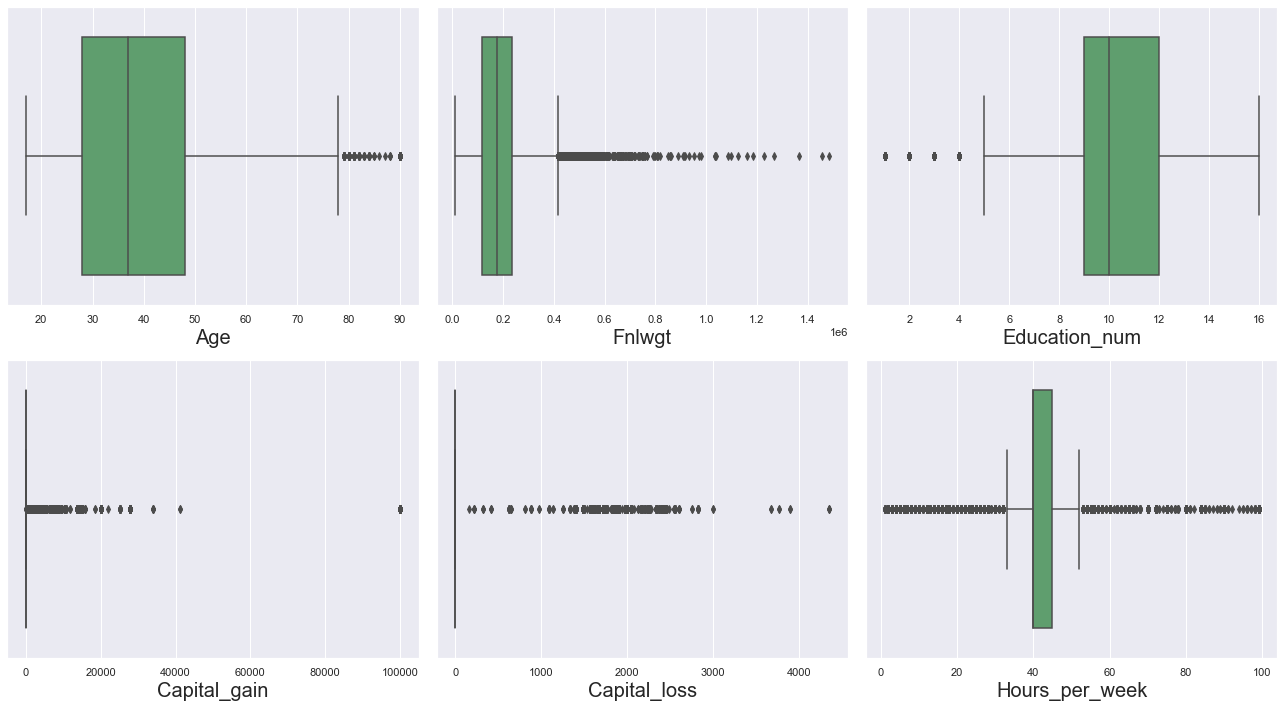

In [66]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## From Boxplot we can see outliers exist dataset.

In [67]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [68]:
df.head(10)

Age  Workclass  Education_num  Marital_status  Occupation  Relationship  \
0   50          5             13               2           3             0   
1   38          3              9               0           5             1   
2   53          3              7               2           5             0   
3   28          3             13               2           9             5   
4   37          3             14               2           3             5   
5   49          3              5               3           7             1   
6   52          5              9               2           3             0   
7   31          3             14               4           9             1   
8   42          3             13               2           3             0   
9   37          3             10               2           3             0   

   Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0     4    1             0             0              13              38   
1     4    1             0             0              40              38   
2     2    1             0             0              40              38   
3     2    0             0             0              40               4   
4     4    0             0             0              40              38   
5     2    0             0             0              16              22   
6     4    1             0             0              45              38   
7     4    0         14084             0              50              38   
8     4    1          5178             0              40              38   
9     2    1             0             0              80              38   

   Income  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       1  
7       1  
8       1  
9       1

## Outliers removal using Zscore method

In [69]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 13)
Shape of the dataframe after removing outliers:  (28061, 13)
Percentage of data loss post outlier removal:  13.753995574133269


## Data Loss

In [70]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


<b><em> We are losing 13.75 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building. We have option to go for quantile method but by looking at boxplot we can say lower capping will result in useful data loss and eventually data loss will be more than zscore method.</em></b>

## 2. Skewness of features

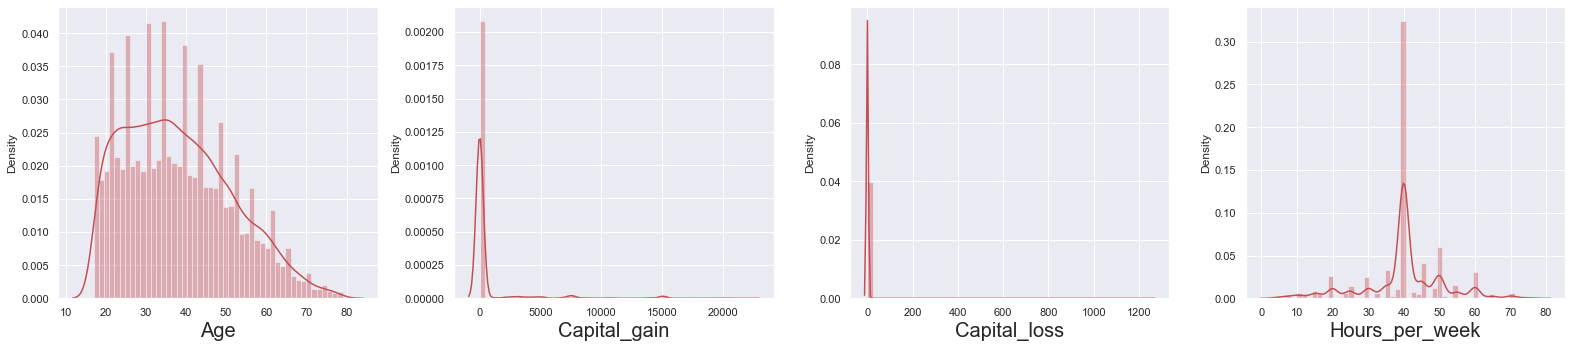

In [71]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [72]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

#### Observation :
- Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

<b> We will have option of scaling data to handle skewness in Capital gain and Capital loss.</b>

## Correlation

In [73]:
df.corr()

Age  Workclass  Education_num  Marital_status  \
Age             1.000000   0.029674       0.045622       -0.286328   
Workclass       0.029674   1.000000      -0.002200       -0.015623   
Education_num   0.045622  -0.002200       1.000000       -0.058587   
Marital_status -0.286328  -0.015623      -0.058587        1.000000   
Occupation     -0.001610   0.008779       0.073142        0.036477   
Relationship   -0.270591  -0.057823      -0.092447        0.183248   
Race            0.021292   0.067532       0.080766       -0.084558   
Sex             0.089469   0.069617       0.003688       -0.125361   
Capital_gain    0.131998   0.011083       0.157858       -0.069601   
Capital_loss    0.023459  -0.010613       0.007348       -0.016396   
Hours_per_week  0.090783   0.028104       0.156303       -0.196053   
Native_country  0.037494   0.001938       0.149688       -0.032575   
Income          0.241844  -0.007699       0.320271       -0.194146   

                Occupation  Relationship      Race       Sex  Capital_gain  \
Age              -0.001610     -0.270591  0.021292  0.089469      0.131998   
Workclass         0.008779     -0.057823  0.067532  0.069617      0.011083   
Education_num     0.073142     -0.092447  0.080766  0.003688      0.157858   
Marital_status    0.036477      0.183248 -0.084558 -0.125361     -0.069601   
Occupation        1.000000     -0.038735  0.000613  0.051055      0.009446   
Relationship     -0.038735      1.000000 -0.146432 -0.577195     -0.089095   
Race              0.000613     -0.146432  1.000000  0.122731      0.031333   
Sex               0.051055     -0.577195  0.122731  1.000000      0.069539   
Capital_gain      0.009446     -0.089095  0.031333  0.069539      1.000000   
Capital_loss     -0.004779      0.030105  0.000186 -0.027323     -0.009077   
Hours_per_week   -0.022194     -0.261919  0.055486  0.236168      0.098705   
Native_country    0.018069     -0.011274  0.018660 -0.011189      0.019185   
Income            0.030664     -0.248263  0.094756  0.211792      0.343487   

                Capital_loss  Hours_per_week  Native_country    Income  
Age                 0.023459        0.090783        0.037494  0.241844  
Workclass          -0.010613        0.028104        0.001938 -0.007699  
Education_num       0.007348        0.156303        0.149688  0.320271  
Marital_status     -0.016396       -0.196053       -0.032575 -0.194146  
Occupation         -0.004779       -0.022194        0.018069  0.030664  
Relationship        0.030105       -0.261919       -0.011274 -0.248263  
Race                0.000186        0.055486        0.018660  0.094756  
Sex                -0.027323        0.236168       -0.011189  0.211792  
Capital_gain       -0.009077        0.098705        0.019185  0.343487  
Capital_loss        1.000000       -0.003440        0.002925 -0.016465  
Hours_per_week     -0.003440        1.000000        0.004380  0.233472  
Native_country      0.002925        0.004380        1.000000  0.047240  
Income             -0.016465        0.233472        0.047240  1.000000

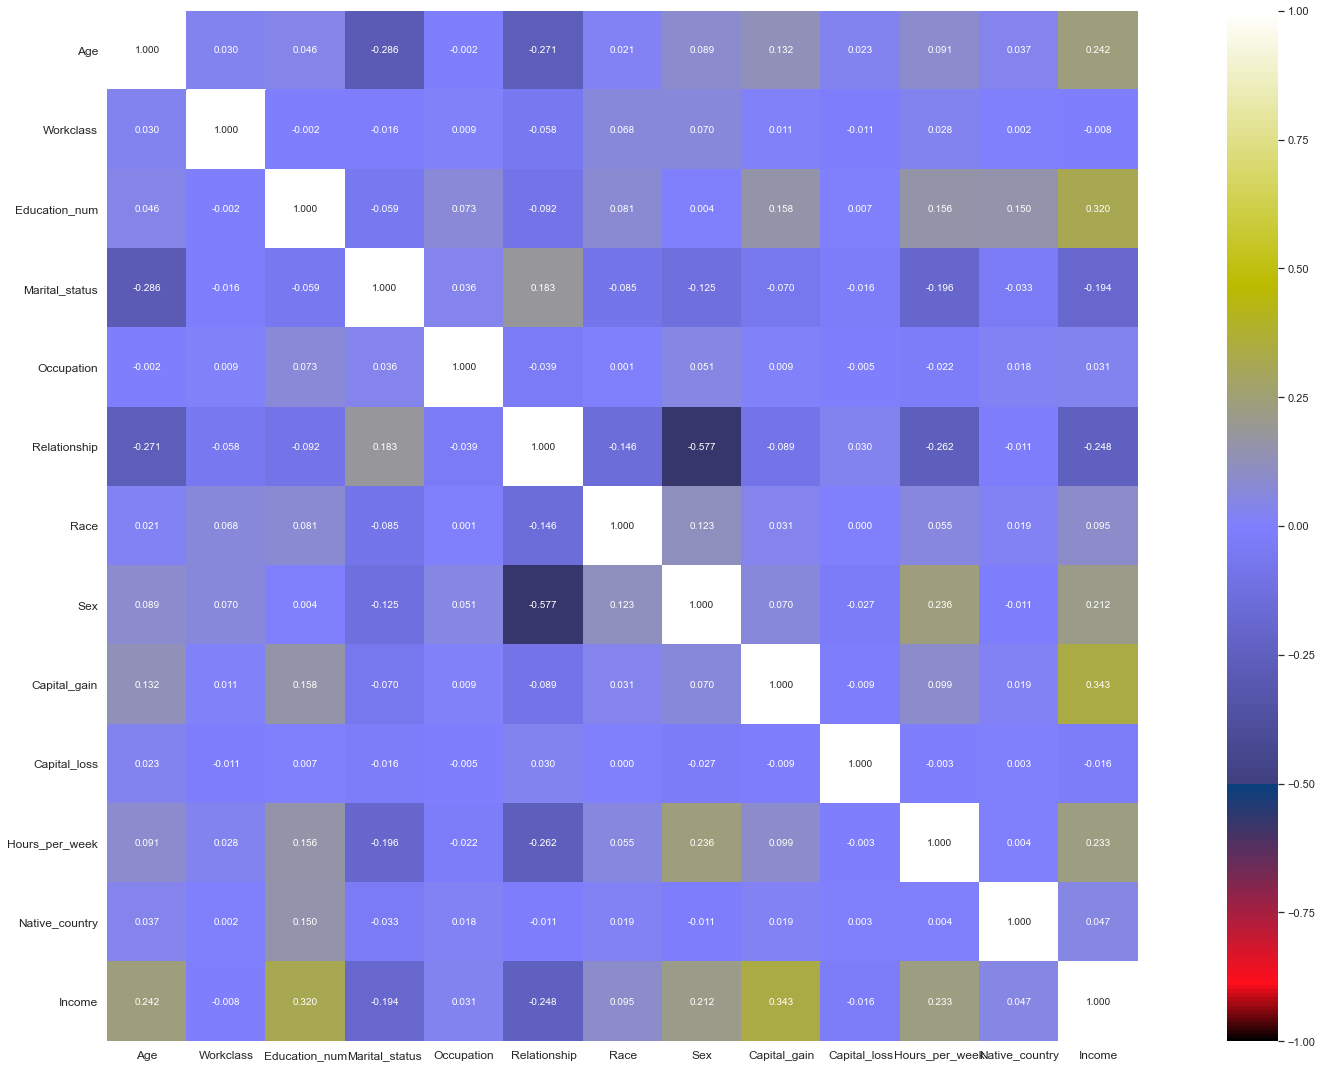

In [74]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

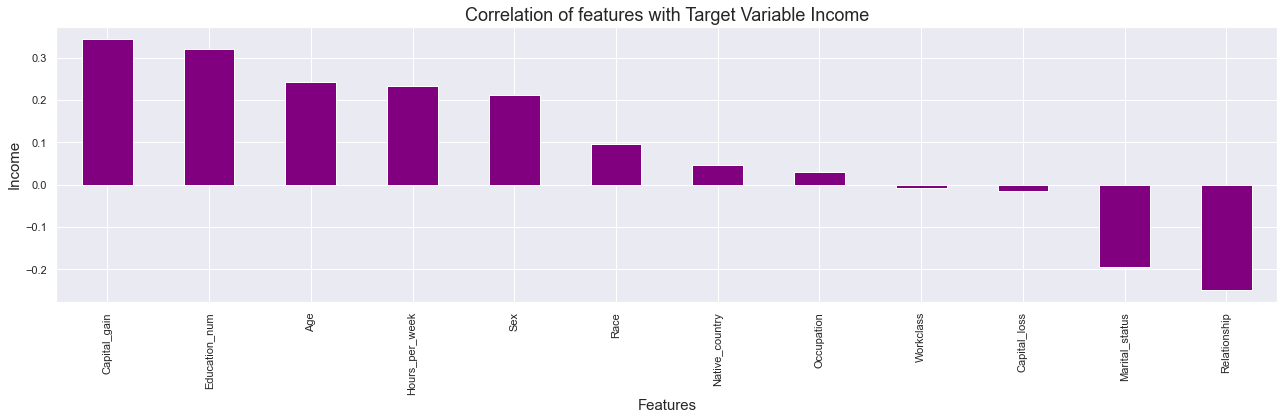

In [75]:
plt.figure(figsize = (18,6))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Income',fontsize = 18)
plt.show()

#### Observation:
- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. <b> After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA. 
    
    As high or low Correlation doesnot mean its causation !!!</b>
- Between input features maximum correlation of -0.557 exist between sex and relationship.
- Capital gain is highly correlated with target variable.


 ## 4. Checking Multicollinearity between features using variance_inflation_factor

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF        Features
0   10.452897             Age
1    8.807425       Workclass
2   21.287850   Education_num
3    4.358505  Marital_status
4    3.357557      Occupation
5    2.937270    Relationship
6   36.291318            Race
7    4.566872             Sex
8    1.209589    Capital_gain
9    1.004295    Capital_loss
10  15.202917  Hours_per_week
11  79.077624  Native_country
12   1.777448          Income

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.  </b>

## 5. Balanceing Imbalanced target feature

In [77]:
df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [80]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [81]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

## We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

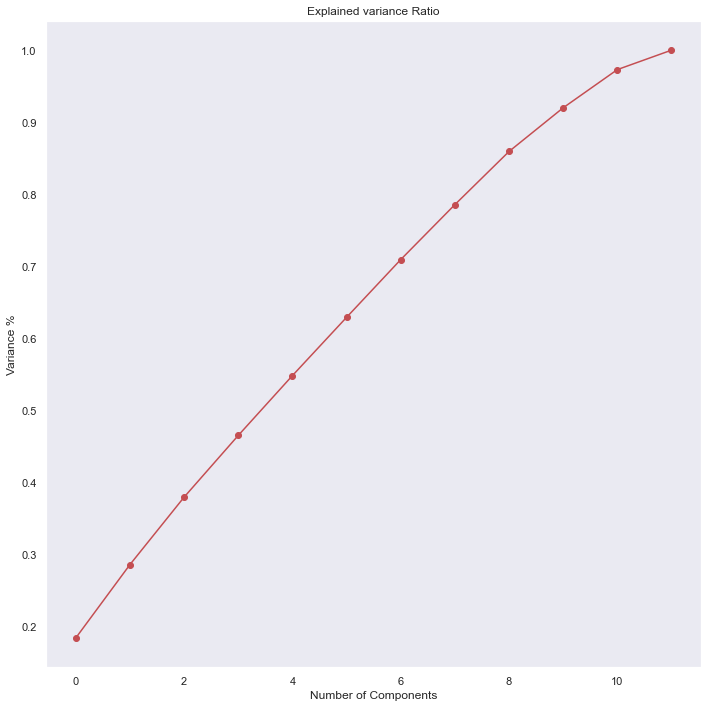

In [83]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Comment -
<b> AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data.  We shall pick the first 9 components for our prediction. </b>

In [84]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [85]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

## Now Building Machine Learning Model for classification Alogorithm

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


## Now finding Best Random State

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7761274021897251 on Random_state 120


In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=82, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7735242324477452


Confusion matrix of Logistics Regression : 
 [[5019 1578]
 [1380 5084]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6597
           1       0.76      0.79      0.77      6464

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



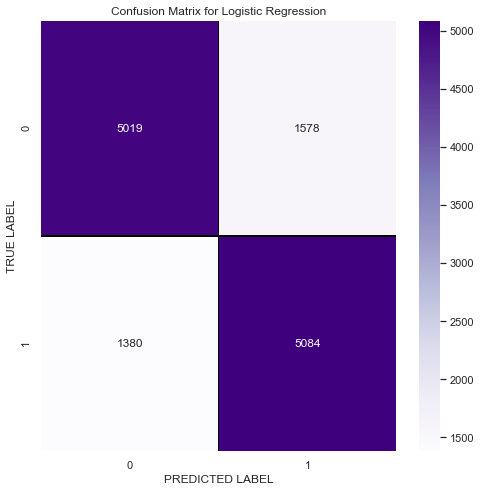

In [90]:
cm = confusion_matrix(Y_test, y_pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [91]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.76065235 0.77144826 0.763983   0.77408981 0.77291523]
Mean CV Score : 0.7686177309114706
Std deviation : 0.0053169936151533665


### Finding Optimal value of n_neighbors for KNN

In [92]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3971416130772601
RMSE value for k=  2 is: 0.4211868487195901
RMSE value for k=  3 is: 0.3926824738950558
RMSE value for k=  4 is: 0.3979120146026416
RMSE value for k=  5 is: 0.3936561487691346
RMSE value for k=  6 is: 0.39520903901454024
RMSE value for k=  7 is: 0.39287740191594417
RMSE value for k=  8 is: 0.39501526158734074
RMSE value for k=  9 is: 0.3926824738950558
RMSE value for k=  10 is: 0.39578980205967906
RMSE value for k=  11 is: 0.3967558513416605
RMSE value for k=  12 is: 0.39839275902661153


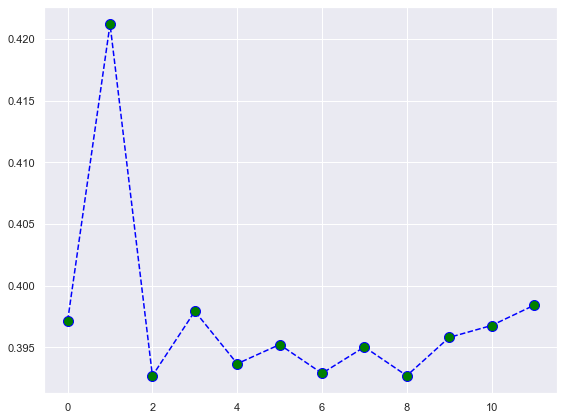

In [93]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k=3, we get the minimum RMSE value which approximately .3926824738950558, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case


## Applying other classification algorithm

In [109]:

model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=82, test_size=.3)
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    
    
    CVscore = cross_val_score(m, principle_x, Y, cv =5)
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("CVScore :" ,CVscore)
    print("Mean CV Score :",CVscore.mean())
    print("Std deviation :",CVscore.std())
    print('============================================================================================================')
    
    

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7735242324477452


Confusion matrix : 
 [[5019 1578]
 [1380 5084]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6597
           1       0.76      0.79      0.77      6464

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



Cross Validation Score LogisticRegression() :

CVScore : [0.76065235 0.77144826 0.763983   0.77408981 0.77291523]
Mean CV Score : 0.7686177309114706
Std deviation : 0.0053169936151533665
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8317892963785315


Confusion matrix : 
 [[5032 1565]
 [ 632 5832]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      6597
           1    

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=82, test_size=.3)
GBC=GradientBoostingClassifier()
GBC.fit(X_train,Y_train)
y_pred=GBC.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))


CVscore = cross_val_score(GBC, principle_x, Y, cv =5)
print('\033[1m'+'Cross Validation Score', GBC, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.8182375009570477


Confusion matrix of Gradient Boosting Classifier : 
 [[5165 1432]
 [ 942 5522]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      6597
           1       0.79      0.85      0.82      6464

    accuracy                           0.82     13061
   macro avg       0.82      0.82      0.82     13061
weighted avg       0.82      0.82      0.82     13061

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.80199839 0.82232686 0.81313885 0.82106351 0.82150241]
Mean CV Score : 0.8160060067167137
Std deviation : 0.007748237170603901


- Accuracy for LogisticRegression is 77.35 and F1 score is 77 and CV score is 76.86
- Accuracy for SVC is 83.17 and F1 score is 83 and cv score is  82.59
- Accuracy for GaussianNB is 71.73 and F1 score is 72 and CV score is 71.43
- Accuracy for DecisionTreeClassifier is 81.84 and F1 score 82 and CV score is 82.24
- Accuracy for KNeighborsClassifier( when n_neighbors = 3) is 84.58 and F1 score 85 and cv score is 84.37.
- Accuracy for RandomForestClassifier is 86.17 and F1 score also 86 and cv score is 85.88
- Accuracy for ExtraTreesClassifier is 86.07 and F1 score also 86 and CV score is 86.02
- Accuracy for Gradient BoostingClassifier is 81.82 and F1 score also 82 and CV score is 81.60


**As we see the above  comparision various ML classification algorithms we got the best accuracy and CV score in Extra treeclassifier , so we will do hyperparameter tunning on this algorithm and will save it as final model**

## Hyper Parameter Tuning : GridSearchCV

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [118]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.855 total time=   2.5s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.847 total time=   2.4s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.849 total time=   2.2s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.850 total time=   2.1s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [119]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_split': 5,
 'n_estimators': 150}

## Final Model

In [121]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 150, max_depth=40 ,min_samples_split= 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Accuracy Score :
 0.8631038970982313


Confusion matrix of Extra Trees Classifier : 
 [[5550 1047]
 [ 741 5723]]


Classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      6597
           1       0.85      0.89      0.86      6464

    accuracy                           0.86     13061
   macro avg       0.86      0.86      0.86     13061
weighted avg       0.86      0.86      0.86     13061



## AOC AND ROC PLOT

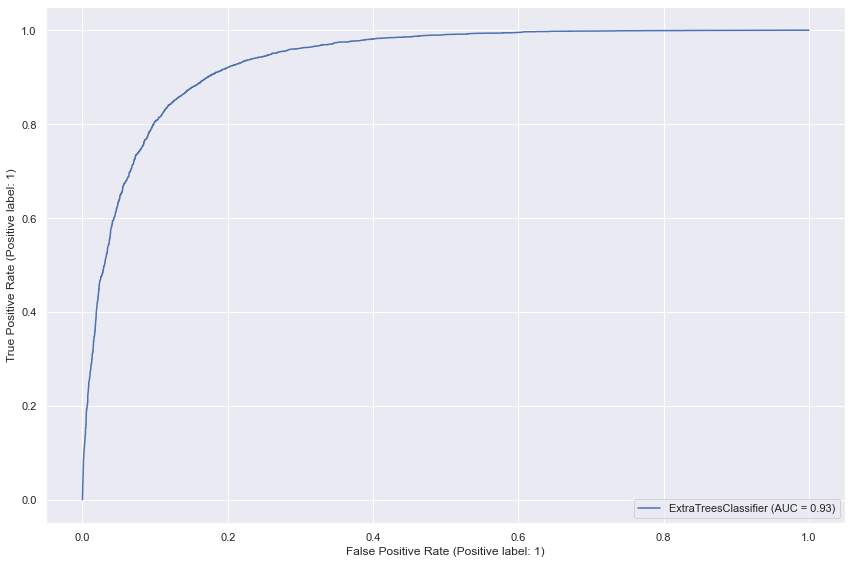

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8633282975722538


In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

##  SAVING MODEL

In [124]:
# Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Census_income.pkl")

['Census_income.pkl']

## PREDICTING THE INCOME 

In [125]:
# Loading the saved model
model=joblib.load("Census_income.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 1, ..., 0, 0, 1])

In [126]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

0      1      2      3      4      5      6      7      8      \
Predicted      1      1      1      0      0      1      1      1      1   
Actual         1      0      0      1      0      1      1      1      1   

           9      10     11     12     13     14     15     16     17     \
Predicted      0      1      1      0      0      0      1      1      1   
Actual         0      1      1      0      1      0      1      1      1   

           18     19     20     21     22     23     24     25     26     \
Predicted      1      0      0      1      1      0      0      0      0   
Actual         1      0      0      1      0      0      0      0      0   

           27     28     29     30     31     32     33     34     35     \
Predicted      0      0      0      0      1      1      1      0      1   
Actual         0      1      0      0      0      0      1      1      1   

           36     37     38     39     40     41     42     43     44     \
Predicted      0      0      0      1      0      0      1      0      0   
Actual         0      0      0      1      0      0      0      0      1   

           45     46     47     48     49     50     51     52     53     \
Predicted      0      1      1      0      1      0      1      0      1   
Actual         0      1      1      0      1      0      1      1      1   

           54     55     56     57     58     59     60     61     62     \
Predicted      0      0      0      0      0      1      1      0      1   
Actual         0      0      0      0      0      1      1      0      1   

           63     64     65     66     67     68     69     70     71     \
Predicted      1      1      0      0      1      1      1      0      1   
Actual         0      1      0      0      1      0      1      0      1   

           72     73     74     75     76     77     78     79     80     \
Predicted      0      0      1      1      0      0      0      0      1   
Actual         0      0      1      1      0      0      0      0      1   

           81     82     83     84     85     86     87     88     89     \
Predicted      1      1      0      0      1      1      1      1      1   
Actual         1      0      0      1      1      1      0      1      1   

           90     91     92     93     94     95     96     97     98     \
Predicted      1      0      1      1      0      0      0      1      1   
Actual         1      0      1      0      0      0      1      1      1   

           99     100    101    102    103    104    105    106    107    \
Predicted      0      0      1      1      0      0      1      1      1   
Actual         0      0      1      1      0      1      0      1      1   

           108    109    110    111    112    113    114    115    116    \
Predicted      1      1      0      1      0      1      0      1      0   
Actual         1      1      0      0      0      1      1      1      0   

           117    118    119    120    121    122    123    124    125    \
Predicted      0      1      1      0      1      1      1      0      1   
Actual         0      0      1      0      1      0      1      0      1   

           126    127    128    129    130    131    132    133    134    \
Predicted      0      0      1      0      1      1      0      0      1   
Actual         0      0      1      0      1      1      1      0      1   

           135    136    137    138    139    140    141    142    143    \
Predicted      1      1      1      0      0      0      0      1      0   
Actual         1      1      1      0      0      0      0      1      0   

           144    145    146    147    148    149    150    151    152    \
Predicted      0      0      0      0      0      1      1      1      0   
Actual         0      0      0      0      0      1      1      0      0   

           153    154    155    156    157    158    159    160    161    \
Predicted      0      0      0      1     

## Let's Summaries  what we have done till yet.

**1. I have imported necessary liabries like pandas, numpy , matplotlib to load the dataset and to check some stastical features.**

**2. After loading data set I have checked shape of dataset, data types from which we will able to decide which is our target variable and which features affecting the target features.**

**3. Missing value checked, and missing value filled by using mode function, also we have droped some rows which having duplicate values.**

**4. after finding the data types we have distribute the dataset into two features 1. categorical and 2. numerical features, so it helps us to further pre processing on data set.**

**5. after this we have done exploratives data analysis by using various plots(like pie charts, crosstrab, barchart, scatter plot, volin plot etc) base on our target variable /feature i.e income**

**6. Now we have done the feature engineering on dataset by using label encoding.**

**7. after that check the correlation of various feature with target feature and non correlated features we have drop in further steps.**

**8. After checking malticolinearity we have done the PCA, where we got the best 9 features which are highly correlated to our target features.**

**9. Also we have done the data balacing using SMOTE oversampling feature**

**10. afterwards implemented various machine learning model using the best random state of 82, and having the sampling ratio as 70: 30.**

**11. Indentified the final model  base on highest accuracy, F1 score and CV score. Here we got 86.07% accuracy and having very negligible difference in cv score and accuracy score.**

**12. Afterwards deployed hyper parameter tunning on best model using gridsearchCV.**

**13. Afterwards we have save the final model and plotted the AOC and Roc plot on final model.In the final model we got 86.33 accuracy and while ploting AOC and ROC we got the accuracy of 86.31.**


**saved the final model using joblib method in pkl file.**
